<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Aqueous Geochemical Speciation</h1><h2>Exploration Notebook</h2></td>
</tr>
</table>
</left>

### Sample datasets:
- <u>Salt_Verde_River_Trib.csv</u> - water chemistry data from the Salt River ([Sommerfeld *et al.* 1974](https://doi.org/10.2307/40023602)) and Verde Rivers ([Blasch *et al.* 2007](https://pubs.usgs.gov/sir/2005/5198/)) in Arizona, USA
- <u>Salt_Verde_River.csv</u> - two select samples from the dataset described above.
- <u>peru.csv</u> - hot spring samples from the Peruvian Andes ([Newell & Scott 2020](https://doi.org/10.26022/IEDA/111569))
- <u>acidic_hotsprings.csv</u> - acidic hot springs from Yellowstone National Park
- <u>leong2021.csv</u> - pH 7-12 samples from serpentinizing systems in Oman ([Leong *et al.* 2021](https://doi.org/10.1029/2020JB020756))
- <u>S&C10vents.csv</u> - a variety of subsea hydrothermal vent fluids ([Shock & Canovas 2010](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1468-8123.2010.00277.x))
- <u>S&C10vents_200bar.csv</u> - as above, but at 200 bars pressure. Find out how to speciate at higher pressures in the Bonus-Features.ipynb notebook.
- <u>singlesample.csv</u> - a single sample from the leong2021 dataset. Use this CSV as a template for adding new rows of custom sample data!
- <u>singlesample_calcite.csv</u> - as above, but the concentration of Ca+2 is set to equilibrium with the mineral calcite. Find out more in the Bonus-Features.ipynb notebook.

### Ideas to try

---
Getting oriented

1) Open a sample dataset CSV and check out the kinds of variables used in a speciation calculation.
2) Refresh and run this notebook from top to bottom with Kernel > Restart Kernel and Run All Cells.
3) Look through the CSV that is generated ('report.csv' by default). How is it different than the sample dataset?
---
Make some plots

4) Plot the mass contribution of a different basis species, like Ca+2.
5) Try `sort_by='Temperature'` instead of 'pH' when creating a mass contribution plot. How does the plot change? What happens if you use another variable?
6) Purposefully mis-name a basis species and check what the error message says.
7) Plot the mineral saturation index of another sample.
8) Plot different variables against each other with a scatterplot. Try mis-naming a variable to see which are available.
---
Play with the data

9) Speciate another dataset. How did the results change?
10) Plot the mass contribution of Fe+2 in the acidic_hotsprings.csv sample set. What oxidation states are in the speciated complexes? How does this change if you add a column called 'Fe+3' (subheader 'Molality') in acidic_hotsprings.csv, and assign a zero for each sample?

In [1]:
import aqequil
ae = aqequil.AqEquil(db="wrm")

Loading a user-supplied thermodynamic database...
data1.wrm is now set as the active thermodynamic database.
This database is meant for rapid calculations between 0 and 350 °C at water saturation pressure.


In [2]:
speciation = ae.speciate(input_filename='Salt_Verde_River_Trib.csv',
                         exclude=['Year', 'Area'], # exclude metadata columns
                         report_filename='report.csv', # create a CSV of results
                         ) 

Using wrm to speciate Below Salt Banks
Using wrm to speciate Above Salt Banks
Using wrm to speciate Verde River
Using wrm to speciate Genung Springs
Using wrm to speciate Spring Creek
Using wrm to speciate Wet Beaver Creek 1
Using wrm to speciate Wet Beaver Creek 2
Using wrm to speciate West Clear Creek
Using wrm to speciate Verde River near Clarkdale
Using wrm to speciate Verde River below Camp Verde
Using wrm to speciate Sycamore Creek
Using wrm to speciate Oak Creek
Using wrm to speciate Granite Creek
Using wrm to speciate Dry Beaver Creek
Using wrm to speciate Agua Fria River
Using wrm to speciate Ash Creek
Finished!


In [3]:
# look up which sections are in the speciation report
speciation.lookup()

['input',
 'aq_distribution',
 'mineral_sat',
 'redox',
 'charge_balance',
 'ion_activity_ratios',
 'fugacity',
 'basis_totals']

In [4]:
# look up which variables are in a section
speciation.lookup("charge_balance")

['charge imbalance',
 'charge imbalance % of mean charge',
 'charge imbalance % of total charge',
 'ionic strength',
 'mean charge',
 'sigma(mz) anions',
 'sigma(mz) cations',
 'stoichiometric ionic strength',
 'total charge']

In [5]:
# look up a variable
speciation.lookup("charge imbalance").head() # .head() shows only the first 5 results

Sample,charge imbalance
,%
Sample,
Below Salt Banks,0.000211
Above Salt Banks,-0.000895
Verde River,0.000582
Genung Springs,0.000131
Spring Creek,0.000447


In [6]:
# look up multiple variables at once
speciation.lookup(["Temperature", "pH", "Na+", "Cl-"]).head() # .head() shows only the first 5 results

Sample,Temperature,pH,Na+,Cl-
,degC,pH,log_activity,log_activity
Sample,,,,
Below Salt Banks,25.0,8.3,-1.7816,-1.7733
Above Salt Banks,25.0,8.3,-1.7951,-1.7731
Verde River,25.0,8.0,-3.0621,-3.4766
Genung Springs,20.0,7.7,-3.1647,-3.3777
Spring Creek,19.0,7.9,-3.1727,-3.0985


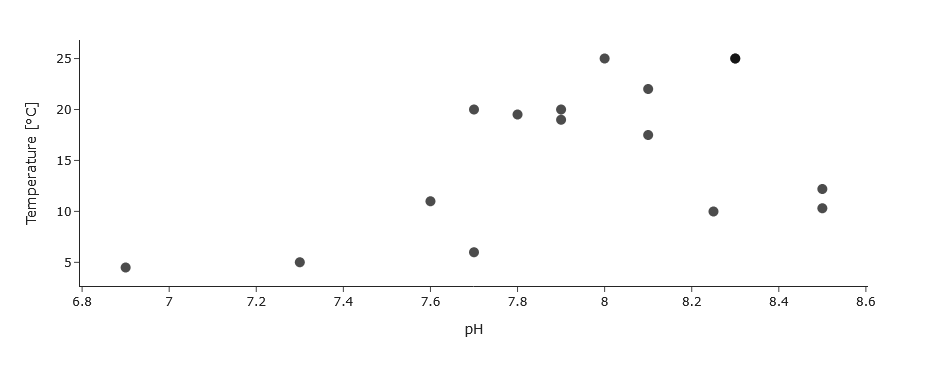

In [7]:
speciation.scatterplot('pH', 'Temperature')

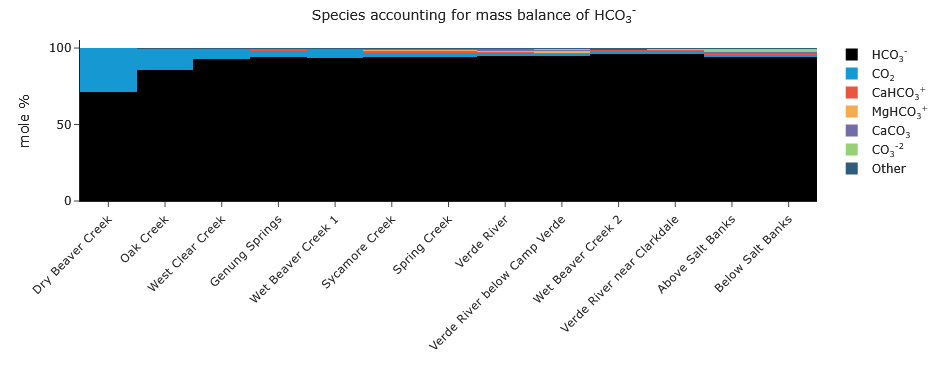

In [8]:
speciation.plot_mass_contribution('HCO3-', sort_by='pH', width=1, plot_width=5)

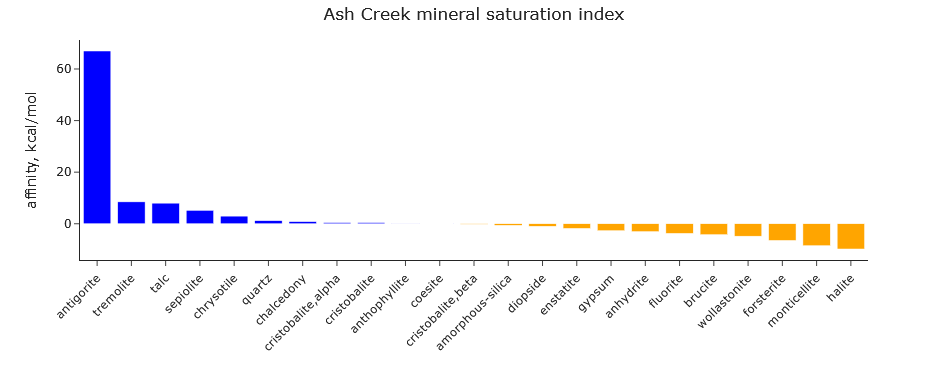

In [9]:
speciation.plot_mineral_saturation('Ash Creek', plot_width=6) # sample name

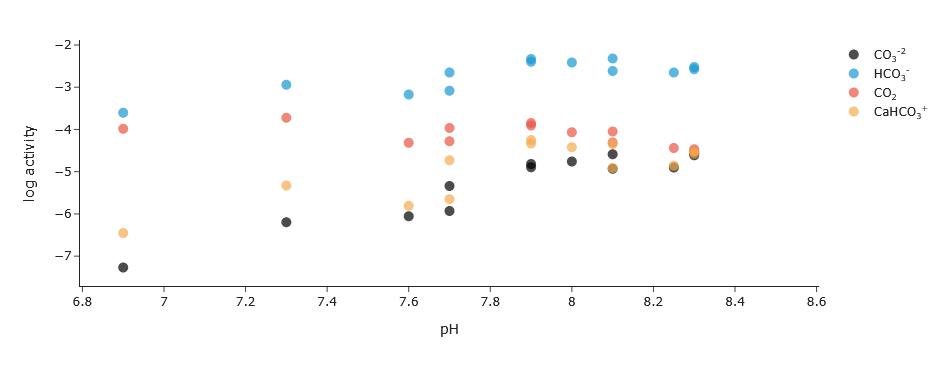

In [10]:
speciation.scatterplot('pH', ['CO3-2', 'HCO3-', 'CO2', 'CaHCO3+'])

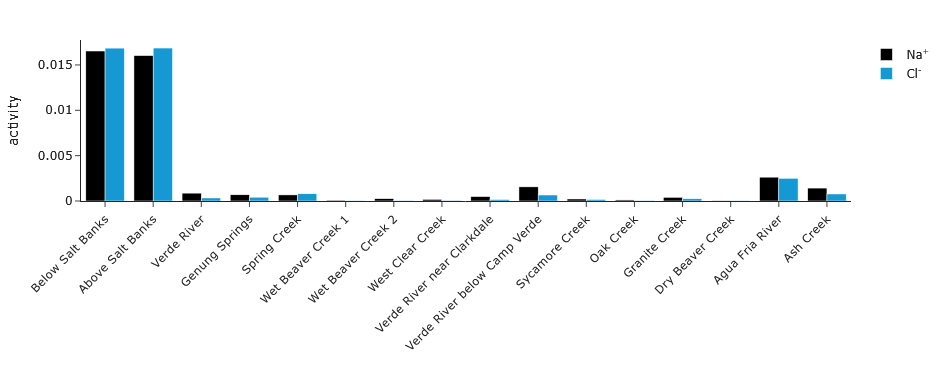

In [11]:
speciation.barplot(['Na+', 'Cl-'], plot_width=6)

# How-To Reference

A few examples of how to get started with aqueous speciation on WORM are given below. For those with more Python experience, or those who wish to see the full range of options for each function, the documentation for the AqEquil Python package can be found [here](https://worm-portal.asu.edu/AqEquil-docs/AqSpeciation.html).

---

### Speciating water chemistry data

Get the equilibration code loaded with:

```python
import aqequil
ae = aqequil.AqEquil()
```

Speciate samples in 'myfile.csv' with:

```python
speciation = ae.speciate(input_filename='myfile.csv')
```

This creates the **speciation** object that stores the results. You can access these results in a few different ways, described below.

---

### Tables

Look up which sections are in the speciation results:

```python
speciation.lookup()
```

Look up which variables are in a section of the results:

```python
speciation.lookup("aq_distribution") # name of the section
```

Look up a desired variable with:

```python
speciation.lookup('O2')
```

Look up multiple variables at once by providing a *list* (several variable names separated by commas and enclosed in square brackets):

```python
speciation.lookup(['Mg+2', 'Mg(HCO3)+', 'Mg(HSiO3)+'])
```

Get the full speciation report with:

```python
speciation.report
```

The report might be truncated in the notebook. You can view the entire report by changing some settings with:

```python
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
speciation.report
```

You can undo this with:
```python
pd.reset_option('display')
```

Another way to view the entire report is by saving it to a CSV file during speciation with `report_filename='myreport.csv'`. For example:

```python
speciation = ae.speciate(input_filename='myfile.csv',
                         report_filename='myreport.csv')
```

The example above creates a file called 'myreport.csv' in the same directory as the Jupyter notebook.

---

### Visualization

Create a pH-temperature scatterplot with:

```python
speciation.scatterplot()
```

Or plot two variables against each other by naming them:

```python
speciation.scatterplot('Na+', 'Cl-')
```

Plot multiple series along the same x-axis by providing a list:

```python
speciation.scatterplot('pH', ['CO2', 'HCO3-', 'CO3-2'])
```

Create a bar plot comparing a variable across all samples:

```python
speciation.barplot('Fe+2')
```

Create a grouped bar plot by providing a list of variables:

```python
speciation.barplot(['Fe+2', 'Fe+3'])
```

Plot the percent contribution of aqueous species to the mass balance of a desired *basis species* with:

```python
speciation.plot_mass_contribution('HCO3-')
```

Plot mineral saturation index of a sample with:

```python
speciation.plot_mineral_saturation('sample_name')
```

where 'sample_name' is the name of a sample.

If a static plot is desired over an interactive one, you can turn off interactivity with `interactive=False`. This is valid for scatterplots and mass contribution plots.

```python
speciation.plot_mass_contribution('sample_name', interactive=False)
```

Save any kind of plot as a PNG by clicking its "download plot as a png" button.

---
### How to Acknowledge WORM

See [this guide](https://worm-portal.asu.edu/docs/acknowledge/) for acknowledging WORM in presentations and publications.

---

### Database:

[Searchable CSV of the WORM database](https://github.com/worm-portal/WORM-db/blob/master/wrm_data.csv)